In [25]:
import matplotlib.pyplot as plt 
import numpy as np 

def addPlayers(nop, ax):
    players = [[0, 8, 'royalblue'], [16,8,'limegreen'], 
               [8, 0, 'gold'],     [8, 16, 'deeppink']]
    for i in range(nop):
        ax.text(players[i][0], players[i][1], u'\u265F', size=30, 
        ha='center', va='center', color=players[i][2])

In [26]:
def addWalls(nop, ax):
    if (nop == 2):
    #1st player's walls
        for i in range(10):
            ax.text(-1, i+3, u'\u268A', size=30, ha='center', va='baseline')

    #2nd player's walls
        for i in range(10):
            ax.text(17, i+3, u'\u268A', size=30, ha='center', va='baseline')

    if (nop == 4):
    #1st player's walls
        for i in range(5):
            ax.text(-1, i+6, u'\u268A', size=30, ha='center', va='baseline')

    #2nd player's walls
        for i in range(5):
            ax.text(17, i+6, u'\u268A', size=30, ha='center', va='baseline')

    #3rd player's walls
        for i in range(5):
            ax.text(i+6, 17, u'\u2759', size=20, ha='center', va='center')

    #4th player's walls
        for i in range(5):
            ax.text(i+6, -1, u'\u2759', size=20, ha='center', va='center')


In [38]:
#Nota, personaje avanza de 2 en 2, ya que se debe reservar un espacio para las paredes
def drawQuoridorBoard(nop):
    bo = np.zeros((17, 17, 3)) #(9, 9) = 9x9 board size + spaces between for walls
    #total of 17x17 board
    bo += 0.8 #opactiy of black spaces
    bo[ ::2, ::2] = 1
    bo[0::2, 0::2] = 1

    fig, ax = plt.subplots(figsize=(7,7)) #figsize = size of the board
    ax.imshow(bo, interpolation='nearest')

    #add players:
    addPlayers(nop, ax)

    #add walls
    addWalls(nop, ax)

    ax.set(xticks=[], yticks=[])
    ax.axis('image')

    plt.show()

In [ ]:
def game():
    #insert bot algorithm here :)

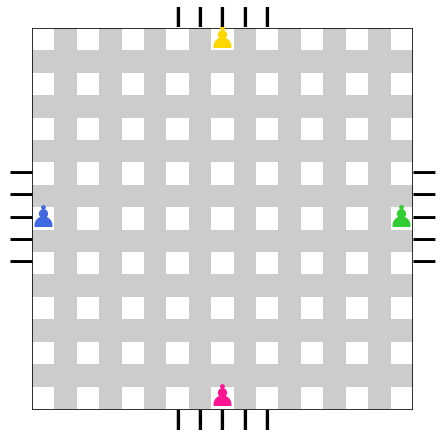

In [39]:
#note: Quoridor can only be played by either 2 or 4 players
#It is imposible to play with 3 players due to the amount of walls
#20 is the amount of walls that should be divided into the number of players
#Ergo, it can only be played by a divisble by 10 number of players (2 or 4)

nop = 4 #number of players

drawQuoridorBoard(nop)